# __06 Regression__

## __Linear Regression__

_Simple linear regression_ considers _n_ samples of a single variable x element of R^n and
describes the relationship between the variable and the resposne with the model:

$$ y = a_0 + a_1x$$

where the parameter $a_0$ is called the _intercept_ or the _constant term_.
Given a set of samples (x, y), we can create a lienar model to explain the data.
But how do we know which is the best model (best params) for this particular set of samples?

_Ordinary Least Squares_ (OLS) is the simplest and most common estimator in which
the parameters ($a$'s) are chosen to minimize the square of the distance between the
predicted values and the actual values with respect to $a_0$, $a_1$:

$$ ||a_0 + a_1x - y||_{2}^{2} = \sum_{j = 1}^{n} (a_0 + a_1x_j - y_j)^2 $$

OLS is a popular approach for several reasons. It makes it computationally cheap to
calculate the coefficients. It is also easier to interpret than the other more sophisticated
models. In situations where the goal is to understand a simple model in detail, rather
than to estimate the response well, it can provide insight into what the model captures.
Finally, in situations where there is a lot of noise, as in many real scenarios, it may
be hard to find the true functional form, so a constrained model can perform quite
well compared to a complex model which can be more affected by noise.

## Practical Case: Sea Ice Data and Climate Change

In [34]:
import pandas as pd
import numpy as np

ice = pd.read_csv('input/SeaIce.txt', delim_whitespace = True)

print(ice.shape)

(424, 6)


In [35]:
# removing non-sense elements
ice2 = ice[ice.data_type != '-9999']

In [36]:
ice2.head()

,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [37]:
ice2.describe()

,year,mo,extent,area
count,422.000000,422.000000,422.000000,422.000000
mean,1996.040284,6.500000,11.777583,9.287796
std,10.222038,3.461872,3.120722,3.180044
min,1978.000000,1.000000,3.630000,2.150000
25%,1987.000000,3.250000,9.360000,6.382500
50%,1996.000000,6.500000,12.395000,9.990000
75%,2005.000000,9.750000,14.560000,12.227500
max,2014.000000,12.000000,16.450000,13.840000


In [38]:
np.unique(ice2.region)

array(['N'], dtype=object)

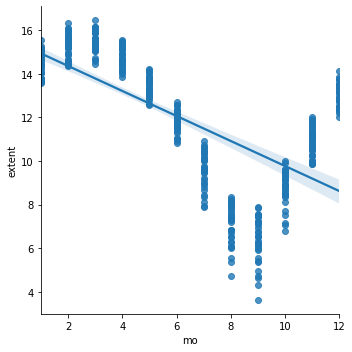

In [39]:
# explore and visualize data
import seaborn as sns

sns.lmplot('mo', 'extent', ice2)

We can observe a monthly fluctuation of the sea ice extent, 
as woulf be expected for the different seasons of the year.

We should normalize the data before performing the regression analysis to avoid
this fluctuation and be able to study the evolution of the extent over the years.
To capture the variation for a given interval of time (month), we can compute
the mean for the i-th interval of time (usint the period from 1979 through 2014 for the mean
extent) $\mu_i$, and subtract it from the set of extet values for that month $\{e_j^i\}$.
This value can be converted to a relative percentage difference by dividing it by the
total average (1979 - 2014) $\mu$, and then multiplying by 100:

$$ \tilde{e} = 100 * \frac{e_j^i - \mu_i}{\mu}, i = 1, 2, ..., 12 $$

In [40]:
# Compute the mean for each month.
grouped = ice2.groupby('mo')
month_means = grouped.extent.mean()
month_variances = grouped.extent.var()
print('Means:', month_means)
print('Variances:',month_variances)

Means: mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances: mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


In [41]:
# implement normalization
for i in range(0, 12):
    ice2.extent[ice2.mo == i + 1] = 100 * (ice2.extent[ice2.mo == i + 1].copy() - month_means[i + 1]) / month_means.mean()

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


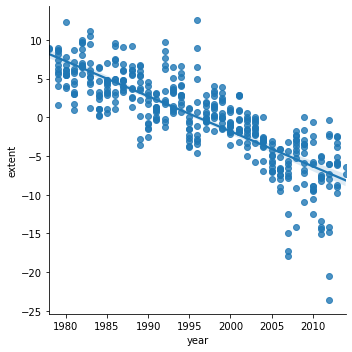

In [42]:
sns.lmplot('year', 'extent', ice2)

In this figure, we can observe that the data show a long-term negative trend over
years. The negative trend can be attributed to global warming, although there is also
a considerable amount of variation from year to year.

In [43]:
# using sk-learn
from sklearn.linear_model import LinearRegression
est = LinearRegression(fit_intercept = True)

In [44]:
# fit a regressor model using years as var and
# extent vals as response
x = ice2[['year']]
y = ice2[['extent']]
est.fit(x, y)

print('coefficients: ', est.coef_)
print('intercept: ', est.intercept_)

coefficients:  [[-0.45275459]]
intercept:  [903.71640207]


We can evaluate the model fitting by computing the mean squared error
(MSE) and the coefficient of determination (R^2) of the model.
The coefficient R^2 is defined as

$$ 1 - \frac{\mathbf{u}}{\mathbf{v}} $$

with 

$$ \mathbf{u} = \sum (\mathbf{y} - \hat{\mathbf{y}})^2$$


$$ \mathbf{v} = \sum (\mathbf{y} - \bar{\mathbf{y}})^2 $$

where $\bar{y}$ is the mean.
The best possible score for R 2 is 1.0, lower values are worse (it can also be
negative). These measures can provide a quantitative answer to the question we are
facing: Is there a negative trend in the evolution of sea ice extent over recent years?
We can perform this analysis for a particular month or for all months together, as
done in the following lines:

In [45]:
from sklearn import metrics
y_hat = est.predict(x)
print('mse: ', metrics.mean_squared_error(y_hat, y))
print('r^2: ', metrics.r2_score(y_hat, y))
print('var: ', y.var())

mse:  10.539131639803482
r^2:  0.5067870382100249
var:  extent    31.98324
dtype: float64


## __Polynomial Regression__

Despite its name, linear regresison can be used to fit non-linear functions.
A linear regression model is linear in the model parameters, not necessarily in the
predictors. If you add non-linear transformations of your predictors to the
linear regression model, the model will be non-linear in the predictors.

A very populat non-linear regression technique is Plynomial Regression,
a technique which models the relationship between the
response and the predictors as an n-th order polynomial

$$ \mathbf{y} = a_1\phi(x_1) + ... a_m\phi(x_m) $$

The higher order the polynomial, the more "wigglier" functions you can fit.

Using higher order polynomial comes at a price:
__computational complexity__ and __overfitting__. Overfitting refers to a 
situtation in which the model fits the idiosyncrasies of the training data
and loses the ability to generalzie from the seen to predict the unseen.

### Housing Data

In [48]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston, y_boston = boston.data, boston.target
print('shape of data: ', X_boston.shape, y_boston.shape)

shape of data:  (506, 13) (506,)


In [49]:
print('keys: ', boston.keys())
print('feature names: ', boston.feature_names)
print(boston.DESCR)

keys:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
feature names:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distance

Text(0, 0.5, 'count')

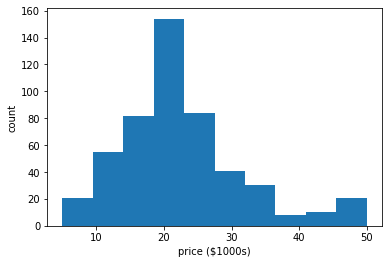

In [50]:
# histogram of prices
import matplotlib.pyplot as plt
plt.hist(y_boston)
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Visualizations

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


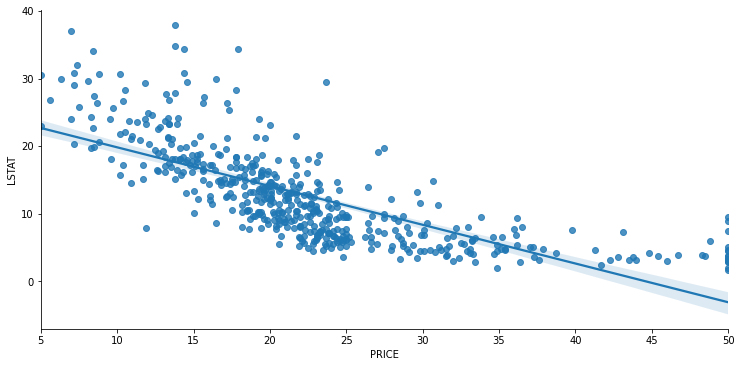

In [52]:
# visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
sns.lmplot('PRICE', 'LSTAT', df_boston, size = 5.2, aspect = 2)
plt.savefig('output/lmplotBostonLSTAT.png', dpi = 300, bbox_inches = 'tight')

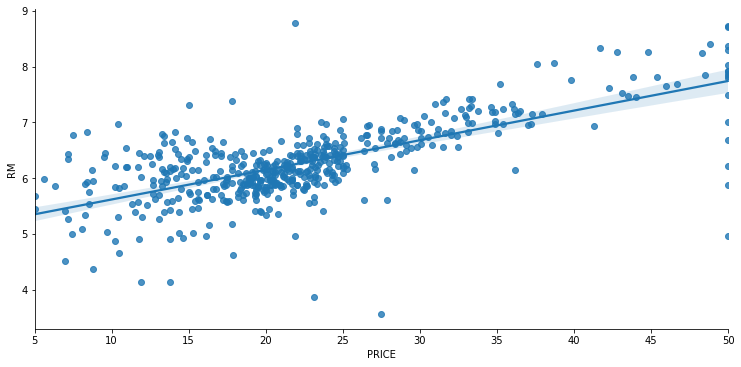

In [55]:
# visualization of the relations between price and RM
sns.lmplot('PRICE', 'RM', df_boston, height = 5.2, aspect = 2)

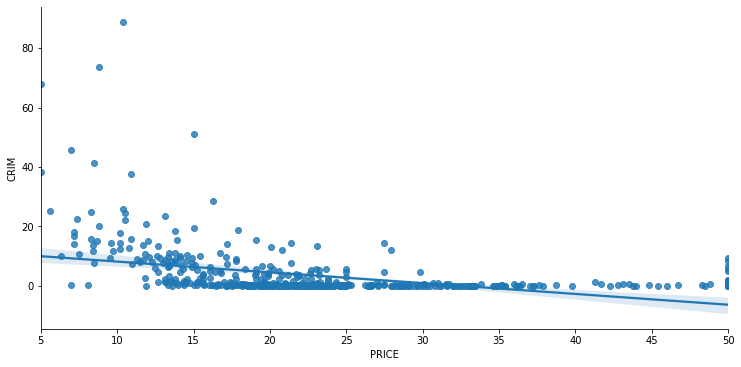

In [56]:
# visualization of the relations between price and CRIM
sns.lmplot('PRICE', 'CRIM', df_boston, height = 5.2, aspect = 2)

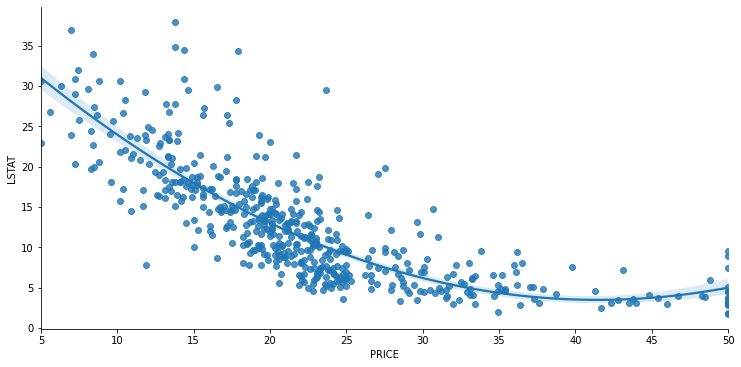

In [57]:
We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".sns.lmplot('PRICE', 'LSTAT', df_boston, order = 2, height = 5.2, aspect = 2)
plt.savefig('output/lmplotBostonLSTAT_order2.png', dpi = 300, bbox_inches = 'tight')

### HeatMap

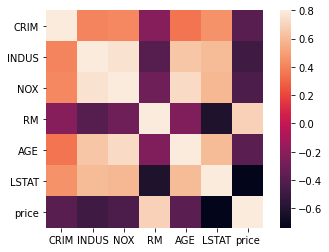

In [58]:
# draw a heatma`
indexes = [0, 2, 4, 5, 6, 12]
df2 = pd.DataFrame(boston.data[:, indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
corrmat = df2.corr()

# draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.savefig('output/corrplot.png', dpi = 300, bbox_indes = 'tight')

In [59]:
# using correlation matrix heatmap we can obser that
# RM and LSTAT are the variables more correlated with
# Price


### ScatterPlot
Let's explore multiple variables with scatter plot The scatter plot of Pandas is a grid of plots of multiple varaibles one against the other, showing the relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set 13 variables (LSTAT, AGE, RM)

In [60]:
print(boston.feature_names)
indexes = [5, 6, 12]
print(boston.feature_names[indexes])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


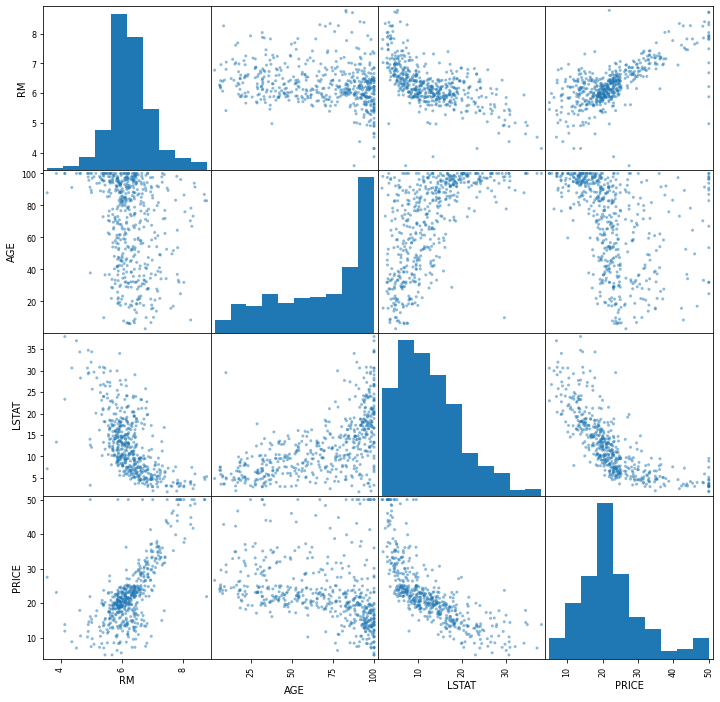

In [62]:
indexes = [5, 6, 12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target
pd.plotting.scatter_matrix(df2, figsize = (12.0, 12.0))
plt.savefig('output/scatterplotBoston.png', dpi = 300, bbox_inches = 'tight')

## __Predictions__

In [64]:
# lets make predictions
from sklearn import linear_model

train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]


In [65]:
# training
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# getting coefficients
print(f'Coeff: {regr_boston.coef_}\t intercept: {regr_boston.intercept_}')

Coeff: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104]	 intercept: -10.017430582945021


In [68]:
# model evaluation
print('trainins score: ', regr_boston.score(X_train, y_train))
print('testing score: ', regr_boston.score(X_test, y_test))
print('training mse: ', np.mean((regr_boston.predict(X_train) - y_train) ** 2))
print('training mse: ', np.mean((regr_boston.predict(X_test) - y_test) ** 2))

trainins score:  0.8557827200735684
testing score:  -2.2527343423925306
training mse:  9.987517325463743
training mse:  303.43686292658987


## __Sparse Mpodels__

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as _LASSO_ (__least absolute shrinkage and selection operator__) to set some model coefficients to zero (thereby discarding those variables). __Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.__

Given the set of samples $(X, y)$, the bojective of a sparse model is to minimize
the SSE (Sum of Squares Error) through a restriction (or penalty):

$$ \frac{1}{2n}||\mathbf{Xw} - \mathbf{y}||_2^2 + \alpha || \mathbf{w}||_1 $$

Where $||\mathbf{w}||_1$ is the L1-norm of the parameter vector $\mathbf{w} = (a_0, ..., a_d)$

In [70]:
# create lasso regressor
regr_lasso = linear_model.Lasso(alpha = 0.3)
regr_lasso.fit(X_train, y_train)

# getting coefficients
print('Coeff and intercept: ', regr_lasso.coef_, regr_lasso.intercept_)

Coeff and intercept:  [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.18324183614838


In [71]:
# model evaluation
print('trainins score: ', regr_lasso.score(X_train, y_train))
print('testing score: ', regr_lasso.score(X_test, y_test))
print('training mse: ', np.mean((regr_lasso.predict(X_train) - y_train) ** 2))
print('training mse: ', np.mean((regr_lasso.predict(X_test) - y_test) ** 2))

trainins score:  0.8449992039829642
testing score:  0.5011275290212163
training mse:  10.734311009544223
training mse:  46.53816809487564


It can now be seen that the result of the model fitting for a set of sparse
coefficients is much better than before (using all the variables).
with the testing score icnreasing from -2.24 to 0.5.
This demonstrates that four of the initial variables are not important
for the prediction and in fact they confuse the regressor.


In [73]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [74]:
indexes_non_selected = [0, 2, 3, 4]
print('non important variable: ', boston.feature_names[indexes_non_selected])
mos_important_index = [5]
print('most important variable', boston.feature_names[mos_important_index])

non important variable:  ['CRIM' 'INDUS' 'CHAS' 'NOX']
most important variable ['RM']


In [76]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important):', boston.feature_names[ind])

Order variable (from less to more important): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


In [78]:
# we can select the most important features
# with sk-learn
import sklearn.feature_selection as fs
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(X_train, y_train)

array([[ 2.31 ,  6.575, 65.2  , 15.3  ,  4.98 ],
       [ 7.07 ,  6.421, 78.9  , 17.8  ,  9.14 ],
       [ 7.07 ,  7.185, 61.1  , 17.8  ,  4.03 ],
       ...,
       [ 5.86 ,  6.487, 13.   , 19.1  ,  5.9  ],
       [ 5.86 ,  6.438,  8.9  , 19.1  ,  3.59 ],
       [ 5.86 ,  6.957,  6.8  , 19.1  ,  3.53 ]])

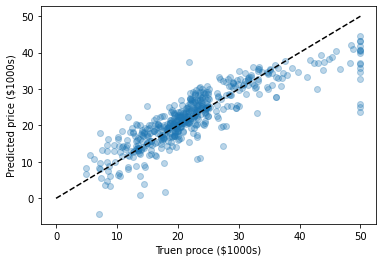

In [79]:
# the set of selected features is now different, since
# the criterion has changed. However, three of the msot important
# features are among them
# RM, PTRATIO, LSTAT
# visualization of target and predicted responses
clf = LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)

import matplotlib.pyplot as plt
plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Truen proce ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.savefig('output/relation_true_pred_prices.png', dpi = 300, bbox_inches = 'tight')

In [80]:
# model evaluation
clf.score(boston.data, boston.target)

0.7406426641094095

In [91]:
# score usng single feature
regr_one_feat = LinearRegression()
for i in range(0, 13):
    feature = X_train[:, i:i + 1]
    regr_one_feat.fit(feature, y_train)
    print(f'Feature: {boston.feature_names[i]:8s}', end=' ')
    print(f'Score: {regr_one_feat.score(feature, y_train):0.3f}')

Feature: CRIM     Score: 0.050
Feature: ZN       Score: 0.102
Feature: INDUS    Score: 0.131
Feature: CHAS     Score: 0.000
Feature: NOX      Score: 0.111
Feature: RM       Score: 0.770
Feature: AGE      Score: 0.113
Feature: DIS      Score: 0.018
Feature: RAD      Score: 0.002
Feature: TAX      Score: 0.055
Feature: PTRATIO  Score: 0.137
Feature: B        Score: 0.046
Feature: LSTAT    Score: 0.504


## __Transformer__

Remember, sometimes Standarizaion is useful.

In [105]:
from sklearn.preprocessing import StandardScaler
y_train_reshape = y_train.reshape(-1, 1)
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train_reshape)
print('statistcs before transofrmation:')
print(f'max: {np.max(y_train_reshape):8.3f} min: {np.min(y_train_reshape):8.3f} mean: {np.mean(y_train_reshape):8.3f}')

statistcs before transofrmation:
max:   50.000 min:   11.800 mean:   24.308


In [110]:
X_train = scalerX.transform(X_train)
y_train_reshape = scalery.transform(y_train_reshape)
X_test = scalerX.transform(X_test)

y_test_reshape = y_test.reshape(-1, 1)
y_test = scalery.transform(y_test_reshape)

print('statistcs after transofrmation:')
print(f'max: {np.max(y_train_reshape):8.3f} min: {np.min(y_train_reshape):8.3f} mean: {np.mean(y_train_reshape):8.3f}')

statistcs after transofrmation:
max:   -3.227 min:   -3.294 mean:   -3.272


## __Statistical Evaluation__

The statsmodels package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the sm.OLS class and its initialization OLS(y, X) method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape (n, p) where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [114]:
import statsmodels.api as sm
X2 = X_boston[:, 12]
X12 = sm.add_constant(X2)
est = sm.OLS(y_boston, X2)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Sat, 11 Jul 2020   Prob (F-statistic):                    2.71e-67
Time:                        17:52:12   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## __Logistic Regression__

Logistic regression or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features).

The logistics function is:

$$ f(x) = \frac{1}{1 + e^{-\lambda x}} $$

The logistic fucntion is useful because it can take an input with
any value from negative infinity to positive infinity,
whereas the output is confined to values between 0 and 1 and hence
is interpretable as a prob.

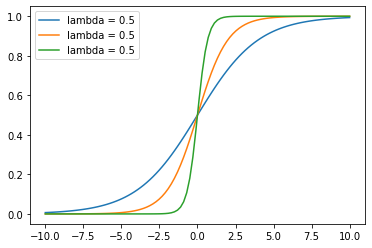

In [116]:
def logistic(x, l):
    return 1 / (1 + np.exp(-l * x))

x = np.linspace(-10, 10, 100)
t = logistic(x, 0.5)
y = logistic(x, 1)
z = logistic(x, 3)

plt.plot(x, t, label = 'lambda = 0.5')
plt.plot(x, y, label = 'lambda = 0.5')
plt.plot(x, z, label = 'lambda = 0.5')
plt.legend(loc = 'upper left')
plt.savefig('output/logistic_regression.png', dpi = 300, bbox_inches = 'tight')

In [117]:
def lr_model(x):
    return 1 / (1 + np.exp(-x))

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
No handles with labels found to put in legend.


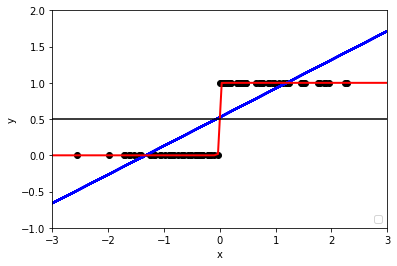

In [121]:
xmin, xmax = -10, 10
np.random.seed(0)

X = np.random.normal(size = 100)

y = (X > 0).astype(np.float)
X = X[:, np.newaxis]

# linear Regression
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# logistic regression
clf = linear_model.LogisticRegression(C = 1e5)
clf.fit(X, y)

# drawing
X_test = np.linspace(-10, 10, 300)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)

plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')

plt.legend(loc = 'lower right')
plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)

plt.savefig('output/linearvsLR.png', dpi = 300, bbox_inches = 'tight')

## __Practical Case: Winning or Losing Football Team__

We want to predict victory or defeat in a football match when we are given the number of goals a team scores. To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it.

In [123]:
# season 2012/2013
file_path = 'input/SP1.csv'
data_football = pd.read_csv(file_path)
s = data_football[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [124]:
s.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Text(0, 0.5, 'Away team goals (FTAG)')

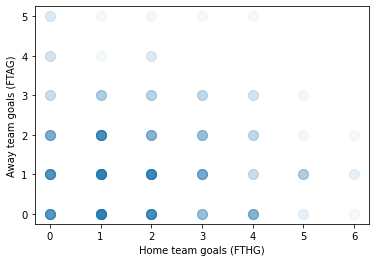

In [127]:
# visualziationn with scatter the number of gaols
plt.scatter(s.FTHG, s.FTAG, s = 100, alpha = 0.05)

plt.xlabel('Home team goals (FTHG)')
plt.ylabel('Away team goals (FTAG)')

In [128]:
# create two extra columns containing 'W'
# the number of gaols od the winner and 'L' the
# nubmer of goals of the losser
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

s['W'] = s.apply(my_f1, axis = 1)
s['L'] = s.apply(my_f2, axis = 1)

/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/concerta/.virtualenvs/lab/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [129]:
s.info()
s.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   W         380 non-null    int64 
 6   L         380 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 20.9+ KB


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,W,L
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1


In [130]:
# create the data and target
import numpy as np
x1 = s['W'].values
y1 = np.ones(len(x1), dtype = np.int)
x2 = s['L'].values
y2 = np.zeros(len(x2), dtype = np.int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])

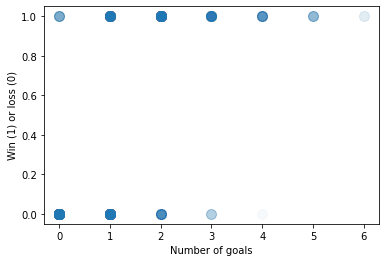

In [131]:
# plot the data
plt.scatter(x, y, s = 100, alpha = 0.03)
plt.xlabel('Number of goals')
plt.ylabel('Win (1) or loss (0)')
plt.savefig('output/scatter_loss_win.png', dpi = 300, bbox_inches = 'tight')

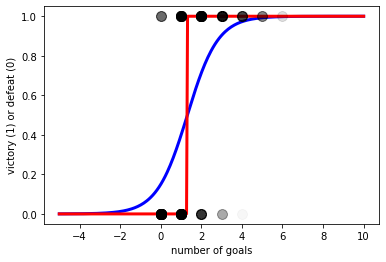

In [133]:
# fitting a logistic regression and rpedict
# using the mdoel
logreg = linear_model.LogisticRegression()
logreg.fit(x, y)

X_test = np.linspace(-5, 10, 300)

loss =  lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel()

X_test2 = X_test[:, np.newaxis]
losspred = logreg.predict(X_test2)

plt.scatter(x.ravel(), y, color = 'black', s = 100, zorder = 20, alpha = 0.03)
plt.plot(X_test, loss, color = 'blue', linewidth = 3)
plt.plot(X_test, losspred, color = 'red', linewidth = 3)
plt.xlabel('number of goals')
plt.ylabel('victory (1) or defeat (0)')
plt.savefig('input/logreg_prediction.png', dpi = 300, bbox_inches = 'tight')



With this information we can estimate that the cut off value is 1. This means that a team has to score more than one goal to win.
